In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="Set2")

# Train-test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

# setting logging to print only error messages from Sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sept11Travel.csv to Sept11Travel.csv


In [3]:
df = pd.read_csv("Sept11Travel.csv")

### Dataset Description

This dataset contains **monthly U.S. transportation statistics** from **January 1990 to August 2004**, covering three key travel metrics:

- **Month:** Period of observation (formatted as `Mon-YY`).
- **Air RPM (000s):** Revenue Passenger Miles by air carriers, measured in thousands.
- **Rail PM:** Passenger Miles traveled by rail.
- **VMT (billions):** Vehicle Miles Traveled on highways, in billions.

The dataset includes **172 monthly records** and can be used for **trend analysis, time series forecasting, and comparison of transportation modes** (air, rail, and road).


# **EDA and Data Preprocessing**

In [4]:
df.head()

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           172 non-null    object 
 1   Air RPM (000s)  172 non-null    int64  
 2   Rail PM         172 non-null    int64  
 3   VMT (billions)  172 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.5+ KB


In [6]:
df.tail()

,Month,Air RPM (000s),Rail PM,VMT (billions)
167,Dec-03,57795908,489403554,237.6
168,Jan-04,53447972,410338691,217.3
169,Feb-04,52608801,389778365,210.4
170,Mar-04,63600019,453014590,247.5
171,Apr-04,61887720,471116666,245.4


In [7]:
# Convert Month to a datetime format
df['Month'] = pd.date_range(start='1990/01/01', end='2004/04/01',freq='MS')

In [8]:
df.head()

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,1990-01-01,35153577,454115779,163.28
1,1990-02-01,32965187,435086002,153.25
2,1990-03-01,39993913,568289732,178.42
3,1990-04-01,37981886,568101697,178.68
4,1990-05-01,38419672,539628385,188.88


In [9]:
df.tail()

,Month,Air RPM (000s),Rail PM,VMT (billions)
167,2003-12-01,57795908,489403554,237.6
168,2004-01-01,53447972,410338691,217.3
169,2004-02-01,52608801,389778365,210.4
170,2004-03-01,63600019,453014590,247.5
171,2004-04-01,61887720,471116666,245.4


In [10]:
# Set the Month to be the index
df.set_index('Month',inplace=True)

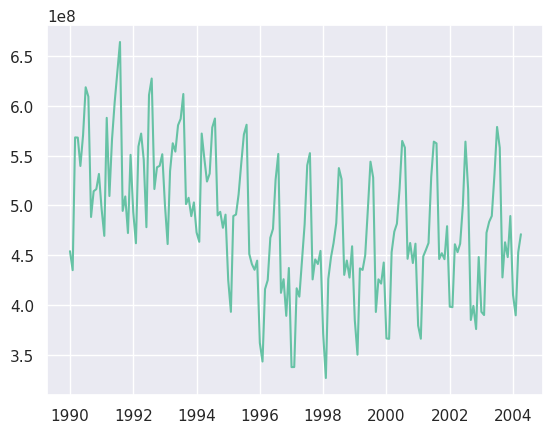

In [11]:
plt.plot(df['Rail PM'])

In [12]:
df.head()

,Air RPM (000s),Rail PM,VMT (billions)
Month,,,
1990-01-01,35153577,454115779,163.28
1990-02-01,32965187,435086002,153.25
1990-03-01,39993913,568289732,178.42
1990-04-01,37981886,568101697,178.68
1990-05-01,38419672,539628385,188.88


In [13]:
df['time period'] = range(1,len(df)+1)

In [14]:
df.head()

,Air RPM (000s),Rail PM,VMT (billions),time period
Month,,,,
1990-01-01,35153577,454115779,163.28,1
1990-02-01,32965187,435086002,153.25,2
1990-03-01,39993913,568289732,178.42,3
1990-04-01,37981886,568101697,178.68,4
1990-05-01,38419672,539628385,188.88,5


In [15]:
df['y(t-1)'] = [float('nan')]+list(df['Rail PM'][:-1])
df['y(t-2)'] = [float('nan')]+list(df['y(t-1)'][:-1])

In [16]:
df.head()

,Air RPM (000s),Rail PM,VMT (billions),time period,y(t-1),y(t-2)
Month,,,,,,
1990-01-01,35153577,454115779,163.28,1,NaN,NaN
1990-02-01,32965187,435086002,153.25,2,454115779.0,NaN
1990-03-01,39993913,568289732,178.42,3,435086002.0,454115779.0
1990-04-01,37981886,568101697,178.68,4,568289732.0,435086002.0
1990-05-01,38419672,539628385,188.88,5,568101697.0,568289732.0


<Axes: >

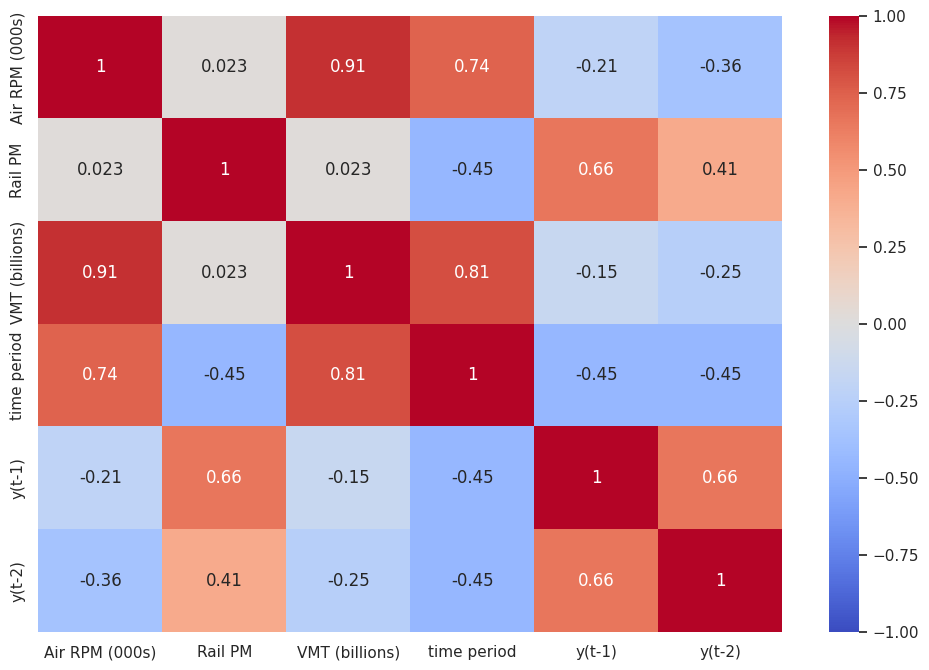

In [17]:
# Compute correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))

# Display correlation matrix in a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# **Model Developemnt**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [19]:
df.head()

,Air RPM (000s),Rail PM,VMT (billions),time period,y(t-1),y(t-2)
Month,,,,,,
1990-01-01,35153577,454115779,163.28,1,NaN,NaN
1990-02-01,32965187,435086002,153.25,2,454115779.0,NaN
1990-03-01,39993913,568289732,178.42,3,435086002.0,454115779.0
1990-04-01,37981886,568101697,178.68,4,568289732.0,435086002.0
1990-05-01,38419672,539628385,188.88,5,568101697.0,568289732.0


In [20]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=7, shuffle=False)

In [21]:
ytrain = trainset["Rail PM"]
Xtrain = trainset.drop(columns="Rail PM")
ytest = testset["Rail PM"]
Xtest = testset.drop(columns="Rail PM")

**Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
tree_reg = DecisionTreeRegressor(random_state=451)
tree_rmse_scores = -cross_val_score(tree_reg, Xtrain, ytrain,
                               scoring="neg_root_mean_squared_error",
                               cv=10)

In [24]:
tree_rmse_scores.mean()

np.float64(49672641.3441298)

In [25]:

tree_reg.fit(Xtrain, ytrain)

DecisionTreeRegressor(random_state=451)

In [26]:
# predictions
tree_yhat = tree_reg.predict(Xtrain)
tree_mse = mean_squared_error(ytrain, tree_yhat)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf_reg = RandomForestRegressor(random_state=451)

rf_rmse_scores = -cross_val_score(rf_reg, Xtrain, ytrain,
                               scoring="neg_root_mean_squared_error",
                               cv=10)

In [28]:
rf_rmse_scores.mean()

np.float64(37684550.74696846)

In [29]:
rf_reg.fit(Xtrain, ytrain)

RandomForestRegressor(random_state=451)

In [30]:
# make predictions
rf_yhat = rf_reg.predict(Xtrain)
rf_mse = mean_squared_error(ytrain, rf_yhat)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

np.float64(14608527.355165642)

**Final Model - Random Forest**

In [31]:
# make predictions
yhat = rf_reg.predict(Xtest)
mse = mean_squared_error(ytest, yhat)
rmse = np.sqrt(mse)
rmse

np.float64(33359139.54095791)

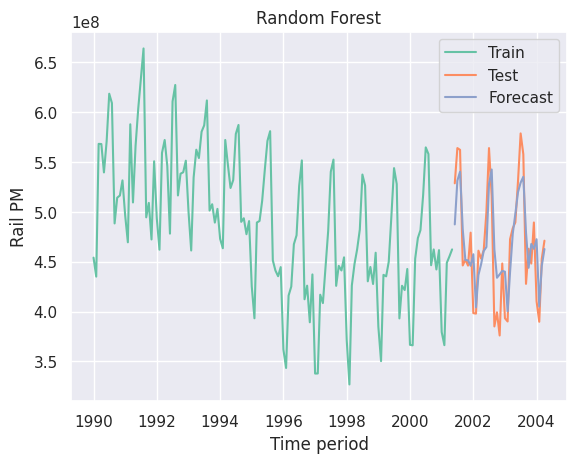

In [32]:
# Plot the train, test, and forecast data with 'Month' on the x-axis
plt.plot(ytrain, label='Train')
plt.plot(ytest, label='Test')
plt.plot(ytest.index, yhat, label="Forecast")

# Add title and legend to the plot
plt.title("Random Forest")
plt.xlabel("Time period")  # Label the x-axis
plt.ylabel("Rail PM")  # Label the y-axis
plt.legend()
plt.show()

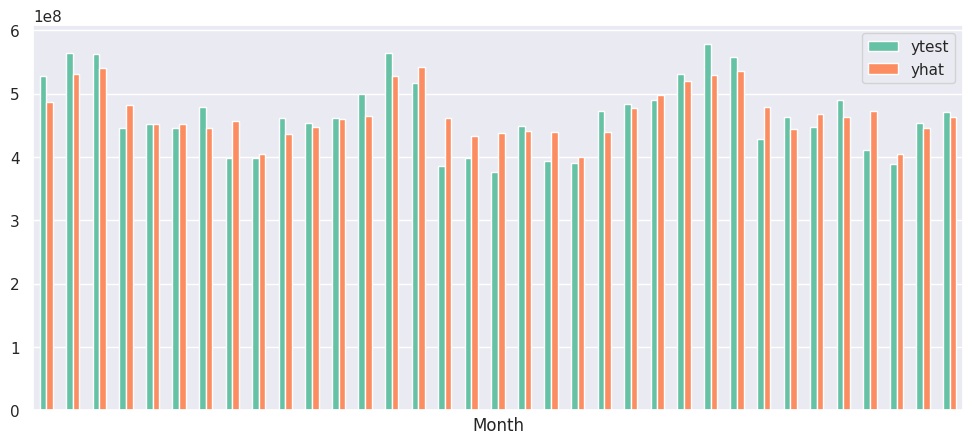

In [33]:
# Create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"ytest": ytest[:50], "yhat": yhat[:50]})

# Plot the dataframe
ax = df_tmp.plot(figsize=(12,5), kind="bar", rot=0)

# Remove x-axis labels
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()

# **Citing this notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/tree/main